In [86]:
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, SpectralClustering
from sklearn import manifold
import matplotlib.patches as mpatches

from IPython.html.widgets import interact, interact_manual, interactive
from IPython.html import widgets

In [56]:
#load the iris datasets
import sklearn.datasets

data = sklearn.datasets.load_iris()
data.data.shape

(150, 4)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


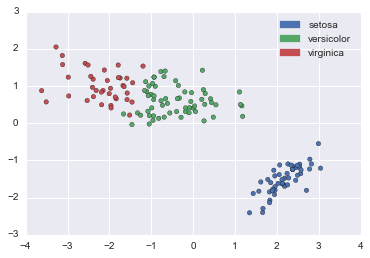

In [140]:
colors = sns.color_palette()
#Dimension reduction using MDS
mds = manifold.MDS(n_components=2, random_state=5)
#fit the model and get the embedded coordinates
pos = mds.fit(data.data).embedding_

global state
state ={}

@interact(param=widgets.IntText(value=3), cluster_algo=["KMeans", "Spectral"])
def show_cluster(param, cluster_algo):
    algorithms = {
        "KMeans": KMeans(n_clusters=param, random_state = 102),
        "Spectral": SpectralClustering(n_clusters=param, random_state = 50)
          }
    iris_pred = algorithms.get(cluster_algo).fit_predict(data.data)
    
    plt.scatter(pos[:, 0], pos[:, 1], s=20, c=[colors[i] for i in iris_pred])
   
    #create a legend since we just have one plot and not three fake the legend using patches
    patches = [ mpatches.Patch(color=colors[i], label=data.target_names[i]) for i in range(3) ]
    plt.legend(handles=patches)
    plt.legend()
           
    state["clusters"]=iris_pred
    #print(pos)

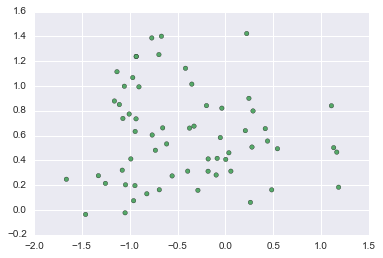

In [137]:
@interact(param=widgets.IntText(value=0))
def show_detail_cluster(param):
    detail_pos = []
    
    iris_pred = state["clusters"]
    #print(iris_pred)
    for i in range(iris_pred.size):
        if iris_pred[i] == param:
            detail_pos.append(pos[i])

    detail_pos = np.array(detail_pos)
    #print(detail_pos)
    plt.scatter(detail_pos[:, 0], detail_pos[:, 1], s=20, c=[colors[param] for i in range(100)])